# Scatter Plot

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [79]:
data = pd.read_csv('EATD_features.csv')

# Extract features and labels
X_test = data[data['Status'] == 'Test'][['Peaks_Per_Second', 'Average_Distance_Between_Peaks']]
y_test = data[data['Status'] == 'Test']['Class']

X_train = data[data['Status'] == 'Training'][['Peaks_Per_Second', 'Average_Distance_Between_Peaks']]
y_train = data[data['Status'] == 'Training']['Class']

In [13]:
y_test.value_counts(),y_train.value_counts()

(Non-Depressed    200
 Depressed         33
 Name: Class, dtype: int64,
 Non-Depressed    192
 Depressed         57
 Name: Class, dtype: int64)

In [14]:
depressed_samples_test = X_test[y_test == 'Depressed'].sample(n=33, random_state=42)
not_depressed_samples_test = X_test[y_test == 'Non-Depressed'].sample(n=33, random_state=42)

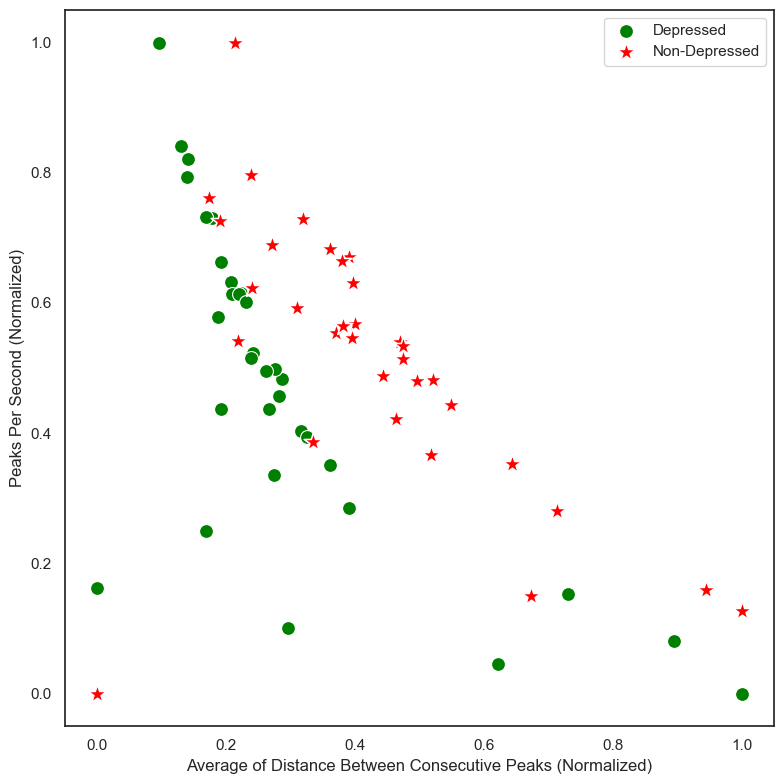

In [6]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
depressed_samples_scaled = scaler.fit_transform(depressed_samples_test)
not_depressed_samples_scaled = scaler.fit_transform(not_depressed_samples_test)

sns.set(style='white')

plt.figure(figsize=(8, 8))  # Square figure
sns.scatterplot(x=depressed_samples_scaled[:, 1], y=depressed_samples_scaled[:, 0], label='Depressed', color='green', marker='o', s=100, alpha=1.0)  # Circular markers with equal size
sns.scatterplot(x=not_depressed_samples_scaled[:, 1], y=not_depressed_samples_scaled[:, 0], label='Non-Depressed', color='red', marker='*', s=200, alpha=1.0)  # Slightly larger star markers
plt.xlabel('Average of Distance Between Consecutive Peaks (Normalized)')
plt.ylabel('Peaks Per Second (Normalized)')
plt.legend()
plt.tight_layout()
plt.show()

# Box Plots

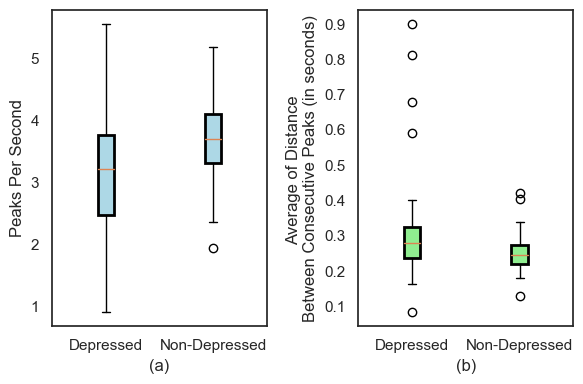

In [8]:
# Create a list of the selected samples and their labels
samples = [depressed_samples['Peaks_Per_Second'], not_depressed_samples['Peaks_Per_Second']]
samples_distance = [depressed_samples['Average_Distance_Between_Peaks'], not_depressed_samples['Average_Distance_Between_Peaks']]
labels = ['Depressed', 'Non-Depressed']

# Create a single figure with subplots (a) and (b)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

# Create box plots for the first feature (Peaks Per Second)
boxprops = {'facecolor': 'lightblue', 'linewidth': 2, 'linestyle': 'dashed'}
ax1.boxplot(samples, labels=labels, patch_artist=True, boxprops=boxprops)
ax1.set_xlabel('(a)')
ax1.set_ylabel('Peaks Per Second')

boxprops_distance = {'facecolor': 'lightgreen', 'linewidth': 2, 'linestyle': 'dashed'}
ax2.boxplot(samples_distance, labels=labels, patch_artist=True, boxprops=boxprops_distance)
ax2.set_xlabel('(b)')
ax2.set_ylabel('Average of Distance \nBetween Consecutive Peaks (in seconds)')

#fig.suptitle('Box Plots: Peaks Per Second and Average Distance Between Peaks', fontsize=16)

plt.tight_layout()
plt.show()


# ML Classifier training on imbalanced training and testing dataset

In [71]:
label_mapping = {'Depressed': 1, 'Non-Depressed': 0}
data["Class"] = data["Class"].map(label_mapping)

In [72]:
training_data=data[data["Status"]=="Training"].reset_index(drop=True)
testing_data=data[data["Status"]=="Test"].reset_index(drop=True)

In [73]:
X_train=training_data[['Peaks_Per_Second', 'Average_Distance_Between_Peaks']]
Y_train=training_data['Class']
X_test=testing_data[['Peaks_Per_Second', 'Average_Distance_Between_Peaks']]
Y_test=testing_data['Class']

In [53]:
X_train_depressed=X_train[training_data["Class"]==1]
X_train_not_depressed=X_train[training_data["Class"]==0]
Y_train_depressed=Y_train[training_data["Class"]==1]
Y_train_not_depressed=Y_train[training_data["Class"]==0]

In [54]:
X_test_depressed=X_test[testing_data["Class"]==1]
X_test_not_depressed=X_test[testing_data["Class"]==0]
Y_test_depressed=Y_test[testing_data["Class"]==1]
Y_test_not_depressed=Y_test[testing_data["Class"]==0]

In [56]:
# Normalize the features using MinMaxScaler for each class
scaler = MinMaxScaler()
X_train_depressed_scaled = scaler.fit_transform(X_train_depressed)
X_test_depressed_scaled = scaler.transform(X_test_depressed)
X_train_not_depressed_scaled = scaler.fit_transform(X_train_not_depressed)
X_test_not_depressed_scaled = scaler.transform(X_test_not_depressed)

In [57]:
X_train_depressed.shape,X_train_not_depressed.shape,X_test_depressed.shape,X_test_not_depressed.shape

((57, 2), (192, 2), (33, 2), (200, 2))

In [58]:
# Concatenate the scaled features
X_train = pd.concat([pd.DataFrame(data=X_train_depressed_scaled, columns=X_train.columns
                                  ),pd.DataFrame(data=X_train_not_depressed_scaled, columns=X_train.columns)])
X_test = pd.concat([pd.DataFrame(data=X_test_depressed_scaled, columns=X_test.columns),pd.DataFrame(data=X_test_not_depressed_scaled, columns=X_test.columns)])
Y_train = pd.concat([Y_train_depressed,Y_train_not_depressed])
Y_test = pd.concat([Y_test_depressed,Y_test_not_depressed])

In [59]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((249, 2), (233, 2), (249,), (233,))

In [62]:
# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Iterate through classifiers
for name, clf in classifiers.items():
    print(f"Classifier: {name}")
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    
    # Print confusion matrix and classification report
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
    print("Classification Report:\n", classification_report(Y_test, Y_pred))


# In[ ]:

Classifier: Decision Tree
Confusion Matrix:
 [[187  13]
 [ 12  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       200
           1       0.62      0.64      0.63        33

    accuracy                           0.89       233
   macro avg       0.78      0.79      0.78       233
weighted avg       0.89      0.89      0.89       233

Classifier: Random Forest
Confusion Matrix:
 [[199   1]
 [ 12  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       200
           1       0.95      0.64      0.76        33

    accuracy                           0.94       233
   macro avg       0.95      0.82      0.87       233
weighted avg       0.94      0.94      0.94       233

Classifier: SVM
Confusion Matrix:
 [[200   0]
 [ 14  19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93  

# ML Classifier on Balanced Training and Testing Data

In [80]:
label_mapping = {'Depressed': 1, 'Non-Depressed': 0}
data["Class"] = data["Class"].map(label_mapping)

In [81]:
training_data=data[data["Status"]=="Training"].reset_index(drop=True)
testing_data=data[data["Status"]=="Test"].reset_index(drop=True)

In [82]:
X_train=training_data[['Peaks_Per_Second', 'Average_Distance_Between_Peaks']]
Y_train=training_data['Class']
X_test=testing_data[['Peaks_Per_Second', 'Average_Distance_Between_Peaks']]
Y_test=testing_data['Class']

In [84]:
X_train_depressed=X_train[training_data["Class"]==1]
X_train_not_depressed=X_train[training_data["Class"]==0].sample(57,random_state=46)
Y_train_depressed=Y_train[training_data["Class"]==1]
Y_train_not_depressed=Y_train[training_data["Class"]==0].sample(57,random_state=46)

In [85]:
X_test_depressed=X_test[testing_data["Class"]==1]
X_test_not_depressed=X_test[testing_data["Class"]==0].sample(33,random_state=69)
Y_test_depressed=Y_test[testing_data["Class"]==1]
Y_test_not_depressed=Y_test[testing_data["Class"]==0].sample(33,random_state=69)

In [86]:
# Normalize the features using MinMaxScaler for each class
scaler = MinMaxScaler()
X_train_depressed_scaled = scaler.fit_transform(X_train_depressed)
X_test_depressed_scaled = scaler.transform(X_test_depressed)
X_train_not_depressed_scaled = scaler.fit_transform(X_train_not_depressed)
X_test_not_depressed_scaled = scaler.transform(X_test_not_depressed)

In [87]:
X_train_depressed.shape,X_train_not_depressed.shape,X_test_depressed.shape,X_test_not_depressed.shape

((57, 2), (57, 2), (33, 2), (33, 2))

In [88]:
# Concatenate the scaled features
X_train = pd.concat([pd.DataFrame(data=X_train_depressed_scaled, columns=X_train.columns
                                  ),pd.DataFrame(data=X_train_not_depressed_scaled, columns=X_train.columns)])
X_test = pd.concat([pd.DataFrame(data=X_test_depressed_scaled, columns=X_test.columns),pd.DataFrame(data=X_test_not_depressed_scaled, columns=X_test.columns)])
Y_train = pd.concat([Y_train_depressed,Y_train_not_depressed])
Y_test = pd.concat([Y_test_depressed,Y_test_not_depressed])

In [89]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((114, 2), (66, 2), (114,), (66,))

In [90]:
# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Iterate through classifiers
for name, clf in classifiers.items():
    print(f"Classifier: {name}")
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    
    # Print confusion matrix and classification report
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
    print("Classification Report:\n", classification_report(Y_test, Y_pred))


# In[ ]:

Classifier: Decision Tree
Confusion Matrix:
 [[24  9]
 [ 9 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        33
           1       0.73      0.73      0.73        33

    accuracy                           0.73        66
   macro avg       0.73      0.73      0.73        66
weighted avg       0.73      0.73      0.73        66

Classifier: Random Forest
Confusion Matrix:
 [[31  2]
 [10 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84        33
           1       0.92      0.70      0.79        33

    accuracy                           0.82        66
   macro avg       0.84      0.82      0.82        66
weighted avg       0.84      0.82      0.82        66

Classifier: SVM
Confusion Matrix:
 [[33  0]
 [14 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00    

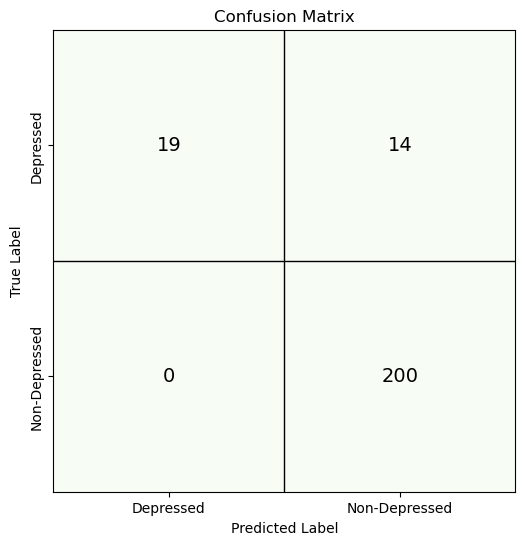

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the confusion matrix values
true_depressed = 19
false_depressed = 0
true_non_depressed = 200
false_non_depressed = 14

# Create the confusion matrix
confusion_matrix = np.array([[true_depressed, false_non_depressed],
                             [false_depressed, true_non_depressed]])

# Plot the confusion matrix without color coding
plt.figure(figsize=(6, 6))
plt.imshow([[0, 0], [0, 0]], cmap='Greens', interpolation='nearest', vmin=0, vmax=200)  # Blank matrix with same size
plt.title('Confusion Matrix')

# Add vertical and horizontal lines to visually divide the cells
for i in range(1):
    plt.axhline(i + 0.5, color='black', linewidth=1)
    plt.axvline(i + 0.5, color='black', linewidth=1)

plt.xticks([0, 1], ['Depressed', 'Non-Depressed'])
plt.yticks([0, 1], ['Depressed', 'Non-Depressed'])

# Add text annotations to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix[i, j]), horizontalalignment='center',
                 verticalalignment='center', color='black', fontsize=14)

# Center the y-axis labels correctly
plt.gca().set_yticks(np.arange(2))
plt.gca().set_yticklabels(['Depressed', 'Non-Depressed'], rotation=90, va="center")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
